<a href="https://colab.research.google.com/github/ag-akanksha/Netflix-Movies-and-TV-Shows-Clustering/blob/main/AA2_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
df.shape

(7787, 12)

In [7]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.shape

(7787, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

In [10]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [11]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('No Country', inplace=True)
df['rating'].fillna('No rating', inplace=True)

In [14]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [15]:
df.type.value_counts(normalize=True)

Movie      0.69051
TV Show    0.30949
Name: type, dtype: float64

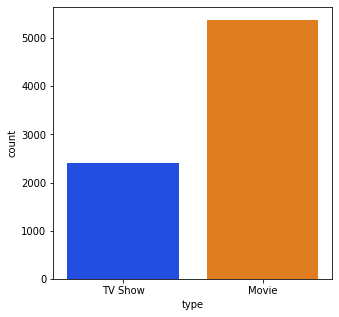

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(df.type,ax=ax, palette='bright')

In [17]:
movies_df = df[df['type']=='Movie'].copy()
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [18]:
shows_df = df[df['type']=='TV Show'].copy()
shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",No Country,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [19]:
df.director.value_counts().head(10)

No Director               2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Name: director, dtype: int64

In [20]:
dir_list=[]

for dir in df.director:
  dir_list.append(dir.split(','))

In [21]:
dir_list

[['No Director'],
 ['Jorge Michel Grau'],
 ['Gilbert Chan'],
 ['Shane Acker'],
 ['Robert Luketic'],
 ['Serdar Akar'],
 ['Yasir Al Yasiri'],
 ['Kevin Reynolds'],
 ['Shravan Kumar'],
 ['Vikram Bhatt'],
 ['Zak Hilditch'],
 ['No Director'],
 ['Diego Enrique Osorno'],
 ['Nottapon Boonprakob'],
 ['John Suits'],
 ['Kunle Afolayan'],
 ['No Director'],
 ['Paul Greengrass'],
 ['Swapnaneel Jayakar'],
 ['No Director'],
 ['Onir'],
 ['Vijay Milton'],
 ['Santwana Bardoloi'],
 ['Atanu Ghosh'],
 ['No Director'],
 ['Lyric R. Cabral', ' David Felix Sutcliffe'],
 ['No Director'],
 ['Cho Il'],
 ['Sabina Fedeli', ' Anna Migotto'],
 ['No Director'],
 ['Michael Margolis'],
 ['Rako Prijanto'],
 ['Rako Prijanto'],
 ['Fernando Lebrija'],
 ['Michael Kennedy'],
 ['Robert McCullough Jr.'],
 ['Cristina Jacob'],
 ['Cristina Jacob'],
 ['No Director'],
 ['Frank Ariza'],
 ['Muharrem Gülmez'],
 ['Óskar Thór Axelsson'],
 ['Ozan Açıktan'],
 ['Kenneth Gyang'],
 ['Karyn Kusama'],
 ['No Director'],
 ['Adam Deyoe'],
 ['Leif Ti

In [22]:
df.cast.value_counts().head(10)

No Cast                                                                                                                   718
David Attenborough                                                                                                         18
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Kevin Hart                                                                                                                  6
Jim Gaffigan                                                                                                          

In [23]:
df.country.value_counts().head(10)

United States     2555
India              923
No Country         507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

In [24]:
df.duration.value_counts().head(15)

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
94 min        125
91 min        125
95 min        119
92 min        118
97 min        117
96 min        115
98 min        106
103 min       101
99 min        101
88 min        101
Name: duration, dtype: int64

In [25]:
movies_df.duration = movies_df.duration.str.replace('min','').astype(int)
shows_df.rename(columns={'duration':'seasons'}, inplace=True)
shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
shows_df.seasons = shows_df.seasons.str.replace('Seasons','').astype(int)

In [26]:
df.listed_in.value_counts().head(25)

Documentaries                                           334
Stand-Up Comedy                                         321
Dramas, International Movies                            320
Comedies, Dramas, International Movies                  243
Dramas, Independent Movies, International Movies        215
Kids' TV                                                205
Children & Family Movies                                177
Documentaries, International Movies                     172
Children & Family Movies, Comedies                      169
Comedies, International Movies                          161
Dramas, International Movies, Romantic Movies           153
Comedies, International Movies, Romantic Movies         139
Dramas                                                  117
Action & Adventure, Dramas, International Movies        117
International TV Shows, TV Dramas                       111
Dramas, International Movies, Thrillers                 109
Crime TV Shows, International TV Shows, 

In [27]:
df.rating.value_counts()

TV-MA        2863
TV-14        1931
TV-PG         806
R             665
PG-13         386
TV-Y          280
TV-Y7         271
PG            247
TV-G          194
NR             84
G              39
No rating       7
TV-Y7-FV        6
UR              5
NC-17           3
Name: rating, dtype: int64

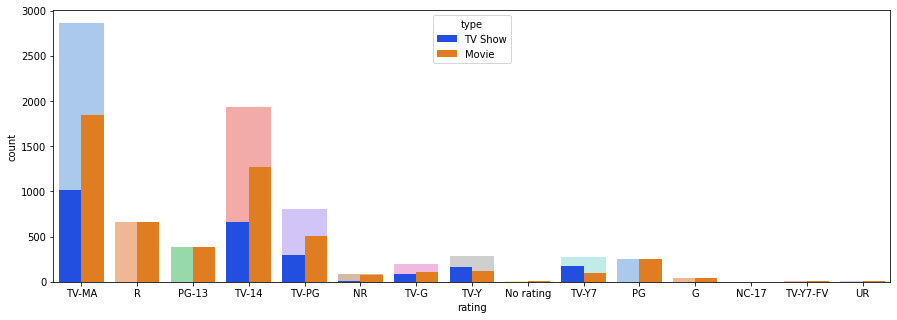

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df.rating,ax=ax, palette='pastel')

sns.countplot(df.rating, hue=df.type,ax=ax, palette='bright')

In [29]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
movies_df['year_added'] = pd.DatetimeIndex(movies_df['date_added']).year
shows_df['year_added'] = pd.DatetimeIndex(shows_df['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
movies_df['month_added'] = pd.DatetimeIndex(movies_df['date_added']).month
shows_df['month_added'] = pd.DatetimeIndex(shows_df['date_added']).month

In [30]:
df.date_added[0]

'August 14, 2020'

In [31]:
df.date_added = pd.to_datetime(df.date_added)

In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0


In [33]:
df.describe()

,release_year,year_added,month_added
count,7787.000000,7777.000000,7777.000000
mean,2013.932580,2018.493378,6.783850
std,8.757395,1.388144,3.591608
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2018.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


In [34]:
df[df.year_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,No Director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN
549,s550,TV Show,Anthony Bourdain: Parts Unknown,No Director,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN
2263,s2264,TV Show,Frasier,No Director,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN,NaN
2288,s2289,TV Show,Friends,No Director,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN,NaN
2555,s2556,TV Show,Gunslinger Girl,No Director,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN,NaN
3374,s3375,TV Show,Kikoriki,No Director,Igor Dmitriev,No Country,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN
3492,s3493,TV Show,La Familia P. Luche,No Director,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN
3946,s3947,TV Show,Maron,No Director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN
5137,s5138,TV Show,Red vs. Blue,No Director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN
6065,s6066,TV Show,The Adventures of Figaro Pho,No Director,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,NaN


In [35]:
df.year_added.fillna(df.release_year,inplace=True)

In [36]:
df[df.year_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


In [37]:
df.describe()

,release_year,year_added,month_added
count,7787.000000,7787.000000,7777.000000
mean,2013.932580,2018.484140,6.783850
std,8.757395,1.422219,3.591608
min,1925.000000,2003.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2018.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


In [38]:
df10=df[df.release_year>2009]

In [39]:
df10=df10[df10.year_added>2009]

In [40]:
df10.groupby('release_year').type.value_counts()

release_year  type   
2010          Movie      136
              TV Show     37
2011          Movie      127
              TV Show     39
2012          Movie      158
              TV Show     61
2013          Movie      202
              TV Show     65
2014          Movie      244
              TV Show     90
2015          Movie      382
              TV Show    159
2016          Movie      642
              TV Show    240
2017          Movie      744
              TV Show    268
2018          Movie      734
              TV Show    387
2019          Movie      582
              TV Show    414
2020          TV Show    457
              Movie      411
2021          TV Show     19
              Movie       12
Name: type, dtype: int64

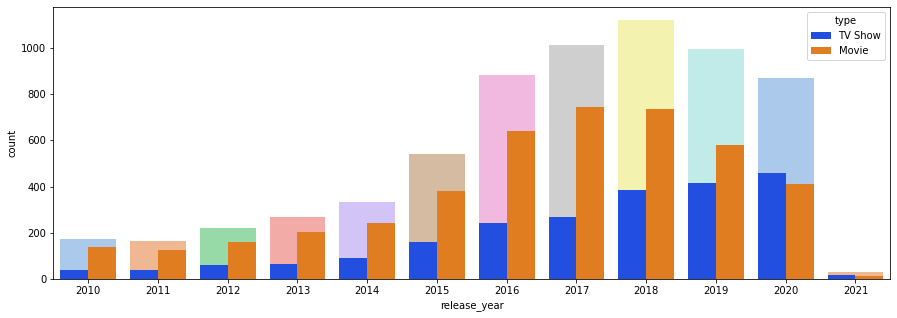

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df10.release_year,ax=ax, palette='pastel')

sns.countplot(df10.release_year, hue=df10.type,ax=ax, palette='bright')

In [42]:
df10.groupby('year_added').type.value_counts()

year_added  type   
2010.0      TV Show       1
2011.0      Movie         1
2012.0      Movie         3
            TV Show       1
2013.0      Movie         6
            TV Show       5
2014.0      Movie        18
            TV Show       3
2015.0      Movie        58
            TV Show      25
2016.0      Movie       238
            TV Show     144
2017.0      Movie       780
            TV Show     319
2018.0      Movie      1025
            TV Show     412
2019.0      Movie      1140
            TV Show     635
2020.0      Movie      1057
            TV Show     662
2021.0      Movie        48
            TV Show      29
Name: type, dtype: int64

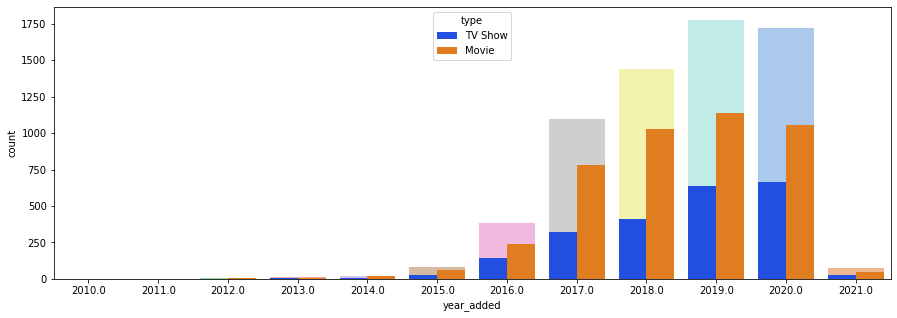

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df10.year_added,ax=ax, palette='pastel')

sns.countplot(df10.year_added, hue=df10.type,ax=ax, palette='bright')

In [44]:
df10.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,7.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0,6.0


In [45]:
df10.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

We decided to remove:

*  ['show_id'] because it doesn't provide significant value

*  ['director'] due to the number of missing values
*  ['release_year'] since I will be using netflix['date_added]'
*  ['rating'] because I wanted to focus more on text based features even though a case could be made that netflix['rating'] could add value

I also removed a few records with missing values from netflix['cast'] and netflix['date_added'].

We removed records that were categorized as Movies or TV Shows due to the broad description / classification.

In [46]:
netflix = df10.drop(['show_id', 'release_year'], axis=1)

In [47]:
netflix['description'] = netflix['description'].str.replace(',', ' ')

In [48]:
movies = netflix[netflix['listed_in'] == 'Movies']
shows = netflix[netflix['listed_in'] == 'TV Shows']
netflix = netflix.drop(movies.index, axis=0)
netflix = netflix.drop(shows.index, axis=0)

In [49]:
netflix['listed_in'] = netflix['listed_in'].str.replace('Anime Features', 'Anime')
netflix['listed_in'] = netflix['listed_in'].str.replace('Anime Series', 'Anime')
netflix['listed_in'] = netflix['listed_in'].str.replace('tv', '')
netflix['listed_in'] = netflix['listed_in'].str.replace('TV', '')
netflix['listed_in'] = netflix['listed_in'].str.replace('Shows', '')
netflix['listed_in'] = netflix['listed_in'].str.replace('Movies', '')
netflix['listed_in'] = netflix['listed_in'].str.replace('Stand-Up Comedy & Talk', 'Stand-Up Comedy')

In [50]:
for show_categories in zip(netflix['listed_in'].index, netflix['listed_in']):
    categories = list()
    for show_category in show_categories[1].split(','):
        categories.append(show_category.strip())
    
    netflix['listed_in'][show_categories[0]] = ', '.join(categories)

In [51]:
print('Number of rows is {}'.format(netflix.shape[0]))
print('Number of columns is {}'.format(netflix.shape[1]))

Number of rows is 6551
Number of columns is 12


**Creation of Show Category Columns**

Using netflix['listed_in'], the following is performed:

* Derive new variables for show (Movie and TV) categories
* Assign new variables the value of 0
* Compare netflix['listed_in'] values for each record against new variables recently created
   * If match found, update value from 0 to 1

For example, I create a new variable titled 'Thrillers' and if 'Thrillers' is a value used to describe a show (Movie and TV) then the dummy variable value is updated from 0 to 1.

These new variables for Show Category also assist in the creation of new variables further down in this notebook.

In [52]:
# Create dataframe specific to show categories
netflix_show_categories = pd.DataFrame(netflix[['director','cast', 'listed_in', 'description']])

In [53]:
# Create a set for show categories
show_categories = set()

for show_category in netflix_show_categories['listed_in']:
    
    # Create list of show categories
    categories = show_category.split(',')
    
    # Add category to set
    for category in categories:
        show_categories.add(category.strip().lower())

In [54]:
# Create show category columns
for show_category in sorted(show_categories):
    
    # Assign initial value
    netflix_show_categories[show_category] = 0

In [55]:
# Retrieve index for description
index = netflix_show_categories.columns.tolist().index('description')

# Column list
netflix_show_columns = netflix_show_categories.columns[(index + 1):].tolist()

In [56]:
for show_category in zip(netflix_show_categories['listed_in'].index, netflix_show_categories['listed_in']):
    
    # Create list of show categories
    categories = show_category[1].split(',')
    
    for category in categories:
        
        # Remove whitespace and set to lowercase
        category = category.strip().lower()
        
        # If show category in show category columns
        if category in netflix_show_columns:
            
            # Update show category to True
            netflix_show_categories[category][show_category[0]] = 1

In [57]:
netflix_show_categories.head()

,director,cast,listed_in,description,action & adventure,anime,british,children & family,classic,classic & cult,...,mysteries,reality,romantic,sci-fi & fantasy,science & nature,spanish-language,sports,stand-up comedy,teen,thrillers
0,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...","International, Dramas, Sci-Fi & Fantasy",In a future where the elite inhabit an island ...,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International",After a devastating earthquake hits Mexico Cit...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror, International",When an army recruit is found dead his fellow...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...","International, Dramas, Mysteries",A genetics professor experiments with a treatm...,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...","Horror, International",After an awful accident a couple admitted to ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


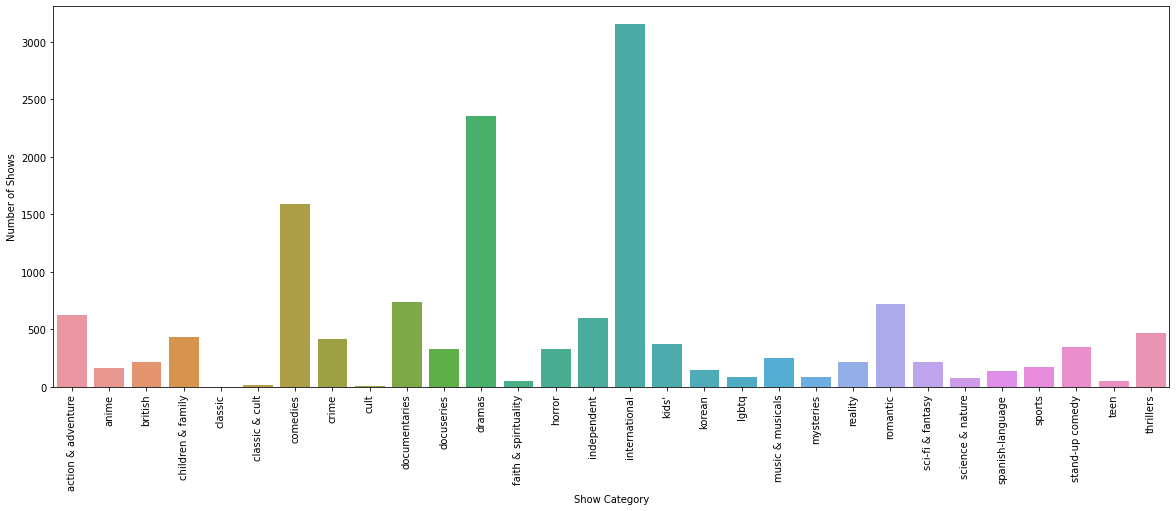

In [58]:
plt.figure(figsize=(20, 7))
sns.barplot(x=netflix_show_columns, y=netflix_show_categories[netflix_show_columns].sum())
plt.ylabel('Number of Shows')
plt.xlabel('Show Category')
plt.xticks(rotation=90)
plt.show()

**Creation of Country Columns**

Using netflix['country'], the following is performed:

Derive new variables for show (Movie and TV) countries
Assign new variables the value of 0
Compare netflix['country'] values for each record against new variables recently created
If match found, update value from 0 to 1
For example, I create a new variable titled 'United States' and if 'United States' is a value used to describe a show (Movie and TV) then the dummy variable value is updated from 0 to 1.

In [59]:
# Create dataframe specific to show countries
netflix_show_countries = pd.DataFrame(netflix['country'])

In [60]:
# Create set for show countries
countries = set()

for country in netflix_show_countries['country']:
  
    # Create list for show countries
    show_countries = country.split(',')

    # Remove empty string
    if '' in show_countries:
        show_countries.remove('')
    
    # Add show country to countries set
    for show_country in show_countries:
        countries.add(show_country.strip().lower())

In [61]:
# Create show country columns
for country in sorted(countries):
    
    # Assign initial value
    netflix_show_countries[country] = 0

In [62]:
# Retrieve index for country
index = netflix_show_countries.columns.tolist().index('country')

# Column list
netflix_country_columns = netflix_show_countries.columns[(index + 1):].tolist()

In [63]:
for country in zip(netflix_show_countries['country'].index, netflix_show_countries['country']):
    
    # Create list of show countries
    show_countries = country[1].split(',')
    
    for show_country in show_countries:
        
        # Remove whitespace and set to lowercase
        show_country = show_country.strip().lower()
        
        # If show country in show country columns
        if show_country in netflix_country_columns:
            
            # Update show country to True
            netflix_show_countries[show_country][country[0]] = 1

In [64]:
netflix_show_countries.head()

,country,afghanistan,albania,algeria,angola,argentina,armenia,australia,austria,azerbaijan,...,uganda,ukraine,united arab emirates,united kingdom,united states,uruguay,vatican city,venezuela,vietnam,zimbabwe
0,Brazil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mexico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Singapore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Turkey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Egypt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


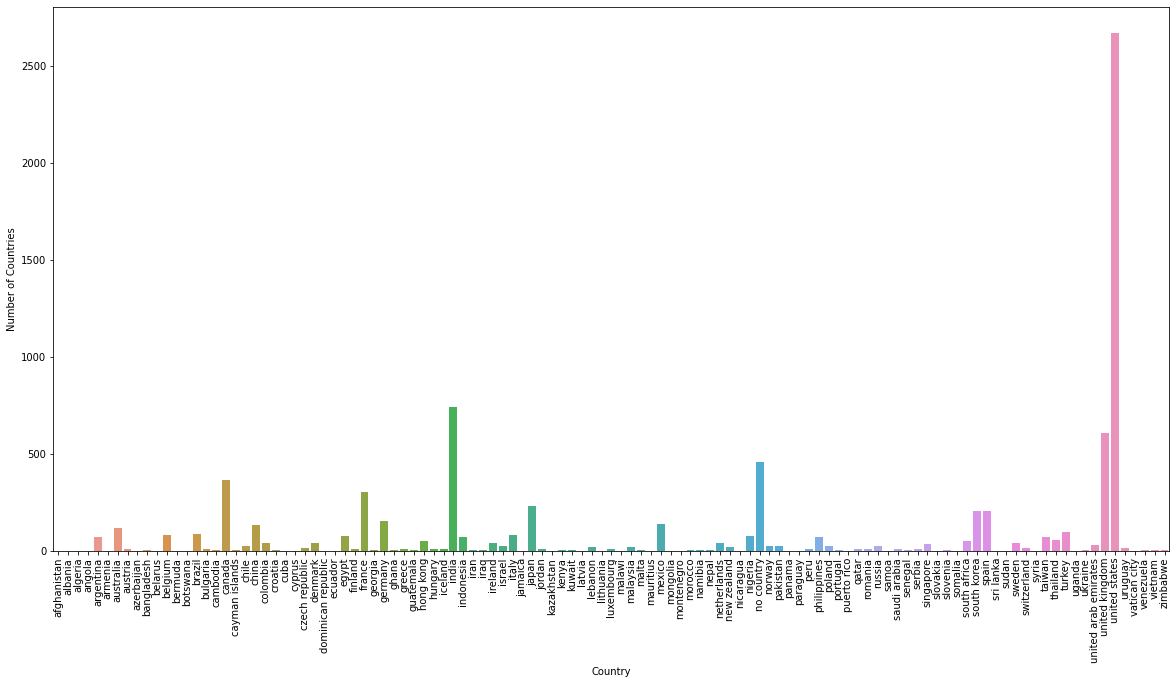

In [65]:
plt.figure(figsize=(20, 10))
sns.barplot(x=netflix_country_columns, y=netflix_show_countries[netflix_country_columns].sum())
plt.ylabel('Number of Countries')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

**Creation of Lead Role Columns**

Using netflix['cast'], the following is performed for each show (Movie and TV) category:

Retrieve all cast members for the show category
For the most frequently used cast members, derive new variables for each cast member
Assign new variables the value of 0
Compare each actor or actress from the netflix['cast'] value for each record against new variables recently created
If match found, update value from 0 to 1
For example, some of the top names used in netflix['cast'] for 'Action & Adventure' are Dwayne Johnson, Bruce Willis, or Arnold Schwarzenegger so new variables for each of these actors would be created. If these names are a value used to describe a show (Movie and TV) then the dummy variable value is updated from 0 to 1.

In [66]:
# Create dataframe specific to cast
netflix_show_cast = pd.DataFrame(netflix['cast'])

In [67]:
from wordcloud import WordCloud
from collections import Counter

In [68]:
netflix_cast = set()

for column in netflix_show_columns:
    
    # Empty list
    column_cast = list()
    
    # String to capture all cast members associated with the show category
    for cast in netflix_show_categories[netflix_show_categories[column] == 1]['cast']:
        cast = cast.split(',')
        column_cast += cast

    word_cloud_dict = Counter(column_cast)
        
    # Create WordCloud object
    wc = WordCloud().generate_from_frequencies(word_cloud_dict)

    # Add cast member to cast set if greater than equal to 0.5
    for key, value in wc.words_.items():
        if value >= 0.6:
            netflix_cast.add(key.strip().lower())

In [69]:
# Create show cast columns
for column_cast in sorted(netflix_cast):
    netflix_show_cast[column_cast] = 0

In [70]:
# Retrieve index for cast
index = netflix_show_cast.columns.tolist().index('cast')

# Column list
netflix_cast_columns = netflix_show_cast.columns[(index + 1):].tolist()

In [71]:
for show_cast in zip(netflix_show_categories['cast'].index, netflix_show_categories['cast']):
    
    # Create list of show cast members
    cast_members = show_cast[1].split(',')

    for cast in cast_members:
        
        # Remove whitespace and set to lowercase
        cast = cast.strip().lower()
        
        # If show cast member in show cast columns
        if cast in netflix_cast_columns:
            
            # Update show cast to True
            netflix_show_cast[cast][show_cast[0]] = 1

In [72]:
netflix_show_cast.head()

,cast,abdelaziz n'mila,abdelilah wahbi,adil hussain,adrien brody,ai kayano,ait youssef youssef,akshay kumar,alison pill,amitabh bachchan,...,teresa palmer,tom wilkinson,um sang-hyun,vinodhini,vipin sharma,woo do‑hwan,yoo yeon-seok,yoshimasa hosoya,yuichi nakamura,yuki kaji
0,"João Miguel, Bianca Comparato, Michel Gomes, R...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creation of Director Columns**

In [73]:
# Create dataframe specific to director
netflix_show_director = pd.DataFrame(netflix['director'])

In [74]:
netflix_director = set()

for column in netflix_show_columns:
    
    # Empty list
    column_director = list()
    
    # String to capture all directors associated with the show category
    for director in netflix_show_categories[netflix_show_categories[column] == 1]['director']:
       director  = director.split(',')
       column_director += director

    word_cloud_dict = Counter(column_director)
        
    # Create WordCloud object
    wc = WordCloud().generate_from_frequencies(word_cloud_dict)

    # Add cast member to cast set if greater than equal to 0.5
    for key, value in wc.words_.items():
        if value >= 0.6:
            netflix_director.add(key.strip().lower())

In [75]:
# Create show director columns
for column_director in sorted(netflix_director):
    netflix_show_director[column_director] = 0

In [76]:
# Retrieve index for cast
index = netflix_show_director.columns.tolist().index('director')

# Column list
netflix_director_columns = netflix_show_director.columns[(index + 1):].tolist()

In [77]:
for show_director in zip(netflix_show_categories['director'].index, netflix_show_categories['director']):
    
    # Create list of show director members
    director_members = show_director[1].split(',')

    for director in director_members:
        
        # Remove whitespace and set to lowercase
        director = director.strip().lower()
        
        # If show director member in show directorcolumns
        if director in netflix_director_columns:
            
            # Update show director to True
            netflix_show_director[director][show_director[0]] = 1

In [78]:
netflix_show_director.head()

,director,adam carolla,bong joon ho,darin scott,david batty,edgar wright,harmony korine,jeff baena,john lee,lana wachowski,...,nate adams,nicolas winding refn,no director,noah baumbach,orson welles,qaushiq mukherjee,rusty cundieff,sean foley,tom tykwer,vlad yudin
0,No Director,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Jorge Michel Grau,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gilbert Chan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Serdar Akar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Yasir Al Yasiri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
netflix_show_director = netflix_show_director.drop(['no director'], axis=1)

In [80]:
netflix_show_director.head()

,director,adam carolla,bong joon ho,darin scott,david batty,edgar wright,harmony korine,jeff baena,john lee,lana wachowski,lilly wachowski,nate adams,nicolas winding refn,noah baumbach,orson welles,qaushiq mukherjee,rusty cundieff,sean foley,tom tykwer,vlad yudin
0,No Director,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jorge Michel Grau,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Gilbert Chan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Serdar Akar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Yasir Al Yasiri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Creation of Keyword Columns**

In [81]:
# Create dataframe specific to show keyword(s)
netflix_show_description = pd.DataFrame(netflix['description'])

In [82]:
for column in netflix_show_columns:
    
    # Empty string
    column_words = ''
    
    # String to capture all words associated with the show category
    for desc in netflix_show_categories[netflix_show_categories[column] == 1]['description']:
        column_words += desc
        
    # Create WordCloud object
    wc = WordCloud().generate(column_words)
    
    # Create list of most frequent words for the show category
    column_keywords = [keyword for keyword in wc.words_.keys()]
    
    # Create show description columns for the top 10 words
    for column_keyword in column_keywords[:10]:
        column_keyword = column_keyword.strip().lower()
        netflix_show_description[column_keyword] = 0

In [83]:
# Retrieve index for description
index = netflix_show_description.columns.tolist().index('description')

# Column list
netflix_keyword_columns = netflix_show_description.columns[(index + 1):].tolist()

In [84]:
for description in zip(netflix_show_categories['description'].index, netflix_show_categories['description']):
    
    # Create list of show description
    show_description = description[1].split(' ')
    
    for desc in show_description:
        
        # Remove whitespace and set to lowercase
        desc = desc.strip().lower()
        
        # If show description words in keyword columns
        if desc in netflix_keyword_columns:
            
            # Update show description to True
            netflix_show_description[desc][description[0]] = 1

In [85]:
netflix_show_description.head()

,description,find,must,two,take,young,life,team,world,cop,...,stand,stand special,comedy,special,share,high school,student,school,club,high
0,In a future where the elite inhabit an island ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,After a devastating earthquake hits Mexico Cit...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,When an army recruit is found dead his fellow...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,A genetics professor experiments with a treatm...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,After an awful accident a couple admitted to ...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
netflix.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating',
       'duration', 'listed_in', 'description', 'year_added', 'month_added'],
      dtype='object')

In [87]:
netflix = pd.concat([netflix, pd.get_dummies(netflix['type'], drop_first=False)], axis=1)
#netflix = pd.concat([netflix, pd.get_dummies(netflix['rating'], drop_first=True)], axis=1)
#netflix = pd.concat([netflix, pd.get_dummies(netflix['duration'], drop_first=True)], axis=1)

In [88]:
#netflix = netflix.drop(['No rating'], axis=1)

In [89]:
# Remove columns that have been transformed
netflix = netflix.drop(['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating','duration', 'listed_in', 'description', 'month_added'], axis=1)

In [90]:
netflix.head()

,year_added,Movie,TV Show
0,2020.0,0,1
1,2016.0,1,0
2,2018.0,1,0
5,2017.0,0,1
6,2020.0,1,0


**Clustering Algorithms**

In [91]:
# Function for length of predictions and silhouette score
def score(X_standard, y_predictions):
    print('Number of clusters in predictions: {}'.format(len(np.unique(y_predictions))))
    print('Silhouette Score: {}'.format(silhouette_score(X_standard, y_predictions, metric='euclidean')))

In [92]:
netflix_cat_dir_cast = netflix.copy()
netflix_cat_dir_cast = pd.concat([netflix_cat_dir_cast, netflix_show_categories], axis=1)
netflix_cat_dir_cast = pd.concat([netflix_cat_dir_cast, netflix_show_director], axis=1)
netflix_cat_dir_cast = pd.concat([netflix_cat_dir_cast, netflix_show_countries], axis=1)
netflix_cat_dir_cast = pd.concat([netflix_cat_dir_cast, netflix_show_cast], axis=1)
netflix_cat_dir_cast = pd.concat([netflix_cat_dir_cast, netflix_show_description], axis=1)
netflix_cat_dir_cast = netflix_cat_dir_cast.drop(['country','cast', 'listed_in', 'director','description'], axis=1)

In [93]:
netflix_cat_dir_cast.head()

,year_added,Movie,TV Show,action & adventure,anime,british,children & family,classic,classic & cult,comedies,...,stand,stand special,comedy,special,share,high school,student,school,club,high
0,2020.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2017.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
import sklearn
from collections import Counter
from wordcloud import WordCloud
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE


In [95]:
# Standardize
scaler = StandardScaler()
netflix_cat_dir_cast_std = scaler.fit_transform(netflix_cat_dir_cast)


In [96]:
# Dimensionality reduction using PCA
pca = PCA(n_components=15)
netflix_cat_dir_cast_pca = pca.fit_transform(netflix_cat_dir_cast_std)

In [97]:
netflix_cat_dir_cast_pca.shape

(6551, 15)

In [98]:
clusters = range(2, 15)

for cluster in clusters:
    
    print('---------------------------------')

    # Define KMeans
    kmeans = KMeans(n_clusters=cluster, random_state=123)

    # Fit modelnetflix_category_keyword_cast
    kmeans.fit(netflix_cat_dir_cast_pca)

    # Predictions
    kmeans_predictions = kmeans.predict(netflix_cat_dir_cast_pca)

    # Metrics
    score(netflix_cat_dir_cast_pca, kmeans_predictions)

---------------------------------
Number of clusters in predictions: 2
Silhouette Score: 0.980057647692743
---------------------------------
Number of clusters in predictions: 3
Silhouette Score: 0.9429587821754051
---------------------------------
Number of clusters in predictions: 4
Silhouette Score: 0.9211078613658729
---------------------------------
Number of clusters in predictions: 5
Silhouette Score: 0.921877496667489
---------------------------------
Number of clusters in predictions: 6
Silhouette Score: 0.9229629116116468
---------------------------------
Number of clusters in predictions: 7
Silhouette Score: 0.23997089141117378
---------------------------------
Number of clusters in predictions: 8
Silhouette Score: 0.2443195457006369
---------------------------------
Number of clusters in predictions: 9
Silhouette Score: 0.2461258349807597
---------------------------------
Number of clusters in predictions: 10
Silhouette Score: 0.2053591747060187
----------------------------

In [99]:
# Define KMeans
kmeans_cat_count_key_cast = KMeans(n_clusters=5, random_state=789)

# Fit model
kmeans_cat_count_key_cast.fit(netflix_cat_dir_cast_pca)

# Predictions
kmeans_predictions_cat_count_key_cast = kmeans_cat_count_key_cast.predict(netflix_cat_dir_cast_pca)

# Metrics
score(netflix_cat_dir_cast_pca, kmeans_predictions_cat_count_key_cast)

Number of clusters in predictions: 5
Silhouette Score: 0.9221928466177582


In [100]:
# Add cluster predictions to dataframe
netflix_cat_dir_cast['kmeans'] = kmeans_predictions_cat_count_key_cast

**Hierarchical**

In [102]:
# Agglomerative clustering (complete)
complete_cosine = AgglomerativeClustering(linkage='complete', affinity='cosine')

# Fit and predictions
complete_cosine_predictions = complete_cosine.fit_predict(netflix_cat_dir_cast_pca)

# Metrics
score(netflix_cat_dir_cast_pca, complete_cosine_predictions)

Number of clusters in predictions: 2
Silhouette Score: 0.19825426580161531


In [103]:
# Agglomerative clustering (complete)
complete_manhattan = AgglomerativeClustering(linkage='complete', affinity='manhattan')

# Fit and predictions
complete_manhattan_predictions = complete_manhattan.fit_predict(netflix_cat_dir_cast_pca)

# Metrics
score(netflix_cat_dir_cast_pca, complete_manhattan_predictions)

Number of clusters in predictions: 2
Silhouette Score: 0.980057647692743


In [104]:
# Agglomerative clustering (ward)
ward_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean')

# Fit and predictions
ward_predictions = ward_cluster.fit_predict(netflix_cat_dir_cast_pca)

# Metrics
score(netflix_cat_dir_cast_pca, ward_predictions)

Number of clusters in predictions: 2
Silhouette Score: 0.980057647692743


In [105]:
# Agglomerative clustering (average)
average_cosine = AgglomerativeClustering(linkage='average', affinity='cosine')

# Fit and predictions
average_cosine_predictions = average_cosine.fit_predict(netflix_cat_dir_cast_pca)

# Metrics
score(netflix_cat_dir_cast_pca, average_cosine_predictions)

Number of clusters in predictions: 2
Silhouette Score: 0.20981289381348614


In [106]:
# Agglomerative clustering (average)
average_manhattan = AgglomerativeClustering(linkage='average', affinity='manhattan')

# Fit and predictions
average_manhattan_predictions = average_manhattan.fit_predict(netflix_cat_dir_cast_pca)

# Metrics
score(netflix_cat_dir_cast_pca, average_manhattan_predictions)

Number of clusters in predictions: 2
Silhouette Score: 0.980057647692743
